In [ ]:
#importing packages
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#importing tensoflow (gets its own section)
import tensorflow as tf

In [ ]:
#import tensorflow utilities
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator as IDG

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing dataset
!unzip "/content/drive/MyDrive/Programming/replicate_1_project/tomato_dataset.zip"

In [ ]:
#setting the directory variables
base_dir = os.path.dirname('/content/tomato_dataset')
train_dir = os.path.dirname('/content/tomato_dataset/train')
val_dir = os.path.dirname('/content/tomato_dataset/val')

In [ ]:
#setting the class variables (training and validation)
train_healthy_dir = os.path.join('/content/tomato_dataset/train/healthy')
train_blight_dir = os.path.join('/content/tomato_dataset/train/Late_blight')
val_healthy_dir = os.path.join('/content/tomato_dataset/val/healthy')
val_blight_dir = os.path.join('/content/tomato_dataset/val/Late_blight')

In [ ]:
#exploring and getting an idea of data size
num_tr_healthy = len(os.listdir(train_healthy_dir))
num_tr_blight = len(os.listdir(train_blight_dir))

num_val_healthy = len(os.listdir(val_healthy_dir))
num_val_blight = len(os.listdir(val_blight_dir))

print('total healthy training images: ', num_tr_healthy)
print('total diseased training images: ', num_tr_blight)
print(' ')
print('total healthy validation images: ', num_val_healthy)
print('total diseased validation images: ', num_val_blight)

total healthy training images:  3051
total diseased training images:  3113
 
total healthy validation images:  806
total diseased validation images:  792


In [ ]:
#setting batch size and img shape for later use
BATCH_SIZE = 1000
IMG_SHAPE = 150

In [ ]:
#mitigating overfitting by resizing and transforming train data
image_gen_train = IDG (rescale=1./255, 
                 rotation_range=45,
                 width_shift_range=.15,
                 height_shift_range=.15,
                 horizontal_flip=True,
                 zoom_range=0.5)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory= '/content/tomato_dataset/train',
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE, IMG_SHAPE),
                                                     class_mode='sparse'
                                                     )

Found 6164 images belonging to 2 classes.


In [ ]:
#resizing and prepping validation data
image_gen_val = IDG(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory='/content/tomato_dataset/val',
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse'
                                                  )

Found 1598 images belonging to 2 classes.


In [ ]:
#building + defining the model!
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(2))

In [ ]:
#compiling the model with optimizer adam
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#time to train the model!

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

epochs = 120

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(BATCH_SIZE)))
)

<ipython-input-44-64baa1d907d1>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/120
7/7 [==============================] - 52s 7s/step - loss: 0.6501 - accuracy: 0.5787 - val_loss: 0.6307 - val_accuracy: 0.6039
Epoch 2/120
7/7 [==============================] - 51s 7s/step - loss: 0.6128 - accuracy: 0.6609 - val_loss: 0.6826 - val_accuracy: 0.5645
Epoch 3/120
7/7 [==============================] - 52s 7s/step - loss: 0.6447 - accuracy: 0.6014 - val_loss: 0.6220 - val_accuracy: 0.6083
Epoch 4/120
7/7 [==============================] - 52s 7s/step - loss: 0.5961 - accuracy: 0.6640 - val_loss: 0.5300 - val_accuracy: 0.7854
Epoch 5/120
7/7 [==============================] - 51s 8s/step - loss: 0.4897 - accuracy: 0.7839 - val_loss: 0.8171 - val_accuracy: 0.5770
Epoch 6/120
7/7 [==============================] - 52s 7s/step - loss: 0.7239 - accuracy: 0.6334 - val_loss: 0.5940 - val_accuracy: 0.6151
Epoch 7/120
7/7 [==============================] - 53s 8s/step - loss: 0.5961 - accuracy: 0.6520 - val_loss: 0.5856 - val_accuracy: 0.7860
Epoch 8/120
7/7 [==========

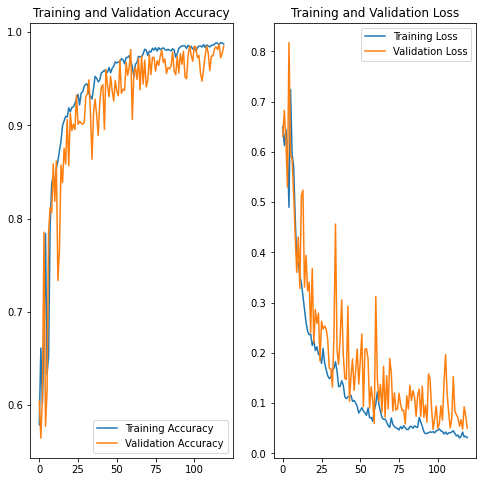

In [ ]:
#plotting the training + validation acurracy graphs to analyze what happened
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()